In [1]:
import sys
import os
import numpy as np
import importlib
import matplotlib.pyplot as plt
HEAD_DIR = os.path.dirname(os.path.realpath('.'))
sys.path.append(HEAD_DIR)
from orbit_cheby import orbit_cheby, nbody_reader

In [2]:
importlib.reload(nbody_reader)
importlib.reload(orbit_cheby)

<module 'orbit_cheby.orbit_cheby' from '/home/mikea/GitHub/orbit_cheby/orbit_cheby/orbit_cheby.py'>

In [3]:
DATA_DIR = os.path.join(HEAD_DIR, 'dev_data')
payne_file = os.path.join(DATA_DIR, '2022AA_demo.txt')
mike_file = os.path.join(DATA_DIR, 'simulation_states.dat')

## Matt Payne's demo file with presumably fake data. 

In [4]:
text_filepath = payne_file
name, times, states  = nbody_reader.parse_nbody_txt( text_filepath )

Data shape: (20000, 27)
time shape: (20000,)
Average timestep: 1.0 days


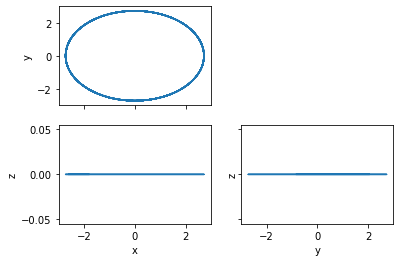

In [5]:
print(f"Data shape: {np.shape(states)}\n"
      f"time shape: {np.shape(times)}\n"
      f"Average timestep: {np.mean(times[1:]-times[:-1])} days")
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0, 0].plot(states[:, 0], states[:, 1])
ax[0, 0].set_ylabel('y')
ax[1, 0].plot(states[:, 0], states[:, 2])
ax[1, 0].set_ylabel('z')
ax[1, 0].set_xlabel('x')
ax[1, 1].plot(states[:, 1], states[:, 2])
ax[1, 1].set_ylabel('z')
ax[1, 1].set_xlabel('y')
fig.delaxes(ax[0, 1])
#ax[0, 0].set_aspect('equal')
#ax[1, 0].set_aspect('equal')
#ax[1, 1].set_aspect('equal')

In [6]:
importlib.reload(nbody_reader)
importlib.reload(orbit_cheby)
MSCs = orbit_cheby.MSC_Loader(FROM_ARRAY = True , 
                            unpacked_provisional_designations = name, 
                            times_TDB = times[:], 
                            statearray = states[:, :6]).MSCs
print( 'Returned variable is of type %r , and length %r  ' % (type(MSCs),len(MSCs) ) )
M3 = MSCs[0]
print( 'Entry in list is of type', type(M3) )
print ( 'Number of sectors = ' , len(M3.sector_coeffs) )
sector_keys = list(M3.sector_coeffs)
_ = [print (f'Shape of sector[{key}] = ' , M3.sector_coeffs[key].shape) for key in sector_keys]

INIT MSC_Loader...
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order 

/home/mikea/.anaconda3/envs/mpcconda37/lib/python3.7/site-packages/numpy/polynomial/chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used

In [7]:
# ******************   Low-level call to get XYZ ******************
XYZs = M3.generate_XYZ( times )

# N.B. final shape = (3,len(times_TDB))
print('Final XYZs.shape = ', XYZs.shape)

# Plot x == XYZs[0] against time ... 
every=1000
plt.plot( evaluation_times[::every] , XYZs[0][::every] , '.' )

KeyError: 623

## An output file from the N-body integrator. 

In [8]:
text_filepath = mike_file
name, times, states  = nbody_reader.parse_nbody_txt( text_filepath )

Data shape: (1760, 6)
time shape: (1760,)
Average timestep: 0.3421301104222605 days


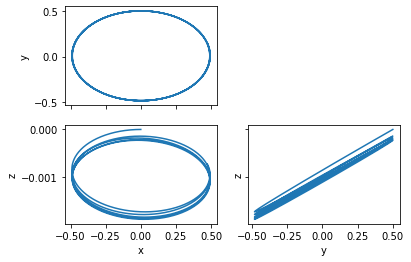

In [9]:
print(f"Data shape: {np.shape(states)}\n"
      f"time shape: {np.shape(times)}\n"
      f"Average timestep: {np.mean(times[1:]-times[:-1])} days")
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0, 0].plot(states[:, 0], states[:, 1])
ax[0, 0].set_ylabel('y')
ax[1, 0].plot(states[:, 0], states[:, 2])
ax[1, 0].set_ylabel('z')
ax[1, 0].set_xlabel('x')
ax[1, 1].plot(states[:, 1], states[:, 2])
ax[1, 1].set_ylabel('z')
ax[1, 1].set_xlabel('y')
fig.delaxes(ax[0, 1])
#ax[0, 0].set_aspect('equal')
#ax[1, 0].set_aspect('equal')
#ax[1, 1].set_aspect('equal')

In [10]:
importlib.reload(nbody_reader)
importlib.reload(orbit_cheby)
MSCs = orbit_cheby.MSC_Loader(FROM_ARRAY = True , 
                            unpacked_provisional_designations = name, 
                            times_TDB = times[:], 
                            statearray = states[:, :6]).MSCs
print( 'Returned variable is of type %r , and length %r  ' % (type(MSCs),len(MSCs) ) )
M2 = MSCs[0]
print( 'Entry in list is of type', type(M2) )
print ( 'Number of sectors = ' , len(M2.sector_coeffs) )
sector_keys = list(M2.sector_coeffs)
_ = [print (f'Shape of sector[{key}] = ' , M2.sector_coeffs[key].shape) for key in sector_keys]

INIT MSC_Loader...
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order used: 17
Order used: 21
Order used: 23
Order used: 24
Order used: 25
Order 

/home/mikea/.anaconda3/envs/mpcconda37/lib/python3.7/site-packages/numpy/polynomial/chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


In [11]:
# ******************   Low-level call to get XYZ ******************
XYZs = M2.generate_XYZ( times )

# N.B. final shape = (3,len(times_TDB))
print('Final XYZs.shape = ', XYZs.shape)

# Plot x == XYZs[0] against time ... 
every=1000
plt.plot( evaluation_times[::every] , XYZs[0][::every] , '.' )

KeyError: 0

## Matt Payne's demo data with some noise added.  

In [12]:
text_filepath = payne_file
name, times, states  = nbody_reader.parse_nbody_txt( text_filepath )
ntimes = len(times)
# Add noise of ~ 1.5 km and 1.5 km/day 
# (which is obviously a stupendous amount of noise)
states = states[:, :6] + np.array([1.01E-8] * 3 + [1E-8] * 3) * np.random.random([ntimes, 6])

Data shape: (20000, 6)
time shape: (20000,)
Average timestep: 1.0 days


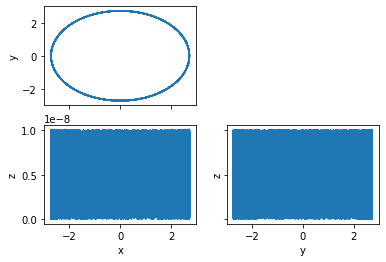

In [13]:
print(f"Data shape: {np.shape(states)}\n"
      f"time shape: {np.shape(times)}\n"
      f"Average timestep: {np.mean(times[1:]-times[:-1])} days")
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0, 0].plot(states[:, 0], states[:, 1])
ax[0, 0].set_ylabel('y')
ax[1, 0].plot(states[:, 0], states[:, 2])
ax[1, 0].set_ylabel('z')
ax[1, 0].set_xlabel('x')
ax[1, 1].plot(states[:, 1], states[:, 2])
ax[1, 1].set_ylabel('z')
ax[1, 1].set_xlabel('y')
fig.delaxes(ax[0, 1])
#ax[0, 0].set_aspect('equal')
#ax[1, 0].set_aspect('equal')
#ax[1, 1].set_aspect('equal')

In [14]:
MSCs = orbit_cheby.MSC_Loader(FROM_ARRAY = True , 
                            unpacked_provisional_designations = name, 
                            times_TDB = times, 
                            statearray = states[:, :6]).MSCs
print( 'Returned variable is of type %r , and length %r  ' % (type(MSCs),len(MSCs) ) )
M1 = MSCs[0]
print( 'Entry in list is of type', type(M1) )
print ( 'Number of sectors = ' , len(M1.sector_coeffs) )
sector_keys = list(M1.sector_coeffs)
_ = [print (f'Shape of sector[{key}] = ' , M1.sector_coeffs[key].shape) for key in sector_keys]

INIT MSC_Loader...
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order 

/home/mikea/.anaconda3/envs/mpcconda37/lib/python3.7/site-packages/numpy/polynomial/chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used: 17
Order used

In [15]:
# ******************   Low-level call to get XYZ ******************
XYZs = M1.generate_XYZ( times )

# N.B. final shape = (3,len(times_TDB))
print('Final XYZs.shape = ', XYZs.shape)

# Plot x == XYZs[0] against time ... 
every=1000
plt.plot( evaluation_times[::every] , XYZs[0][::every] , '.' )

KeyError: 623